**Importing The Libraries**

In [21]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

**One Hot Encoding for Target Class**

In [22]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

**Creating 3 Important Lists --**

1.Data list for storing image data in numpy array form

2.Paths list for storing paths of all images

3.Result list for storing one hot encoded form of target class whether normal or tumor

In [23]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/Brain_Tumor/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [24]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Brain_Tumor/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [25]:
data = np.array(data)     # number of images - 139, height - 128, width - 128
data.shape

(139, 128, 128, 3)

In [26]:
result = np.array(result)
result = result.reshape(139,2)

Splitting the Data into Training & Testing¶


In [27]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2,shuffle=True, random_state=0)  # data shuffle - is used to improve model learning

**Model Buiding**

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.


In [105]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))    # strides is the parameter which decides the movement of kernal
model.add(Dropout(0.25))

model.add(Flatten())     # convert my input layer into 1 dimension

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_16 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)       

In [106]:
y_train.shape

(111, 2)

In [107]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))    # verbose - the level of detail that is provided in the output

Epoch 1/30
3/3 [==============================] - 2s 186ms/step - loss: 57.4955 - val_loss: 91.1169
Epoch 2/30
3/3 [==============================] - 0s 82ms/step - loss: 22.9132 - val_loss: 15.4768
Epoch 3/30
3/3 [==============================] - 0s 80ms/step - loss: 9.6342 - val_loss: 16.9238
Epoch 4/30
3/3 [==============================] - 0s 82ms/step - loss: 8.4728 - val_loss: 2.5976
Epoch 5/30
3/3 [==============================] - 0s 81ms/step - loss: 2.3904 - val_loss: 14.0220
Epoch 6/30
3/3 [==============================] - 0s 81ms/step - loss: 3.5838 - val_loss: 14.7279
Epoch 7/30
3/3 [==============================] - 0s 86ms/step - loss: 2.6621 - val_loss: 5.2946
Epoch 8/30
3/3 [==============================] - 0s 88ms/step - loss: 0.3747 - val_loss: 2.1485
Epoch 9/30
3/3 [==============================] - 0s 89ms/step - loss: 0.7780 - val_loss: 2.2881
Epoch 10/30
3/3 [==============================] - 0s 87ms/step - loss: 0.3945 - val_loss: 1.5723
Epoch 11/30
3/3 [====

In [108]:
r1 = pd.DataFrame(history.history)
r1['Epochs'] = history.epoch
r1.tail()

,loss,val_loss,Epochs
25,0.004566,1.407383,25
26,0.001072,1.503965,26
27,0.002730,1.569648,27
28,0.000440,1.615871,28
29,0.016623,1.634260,29


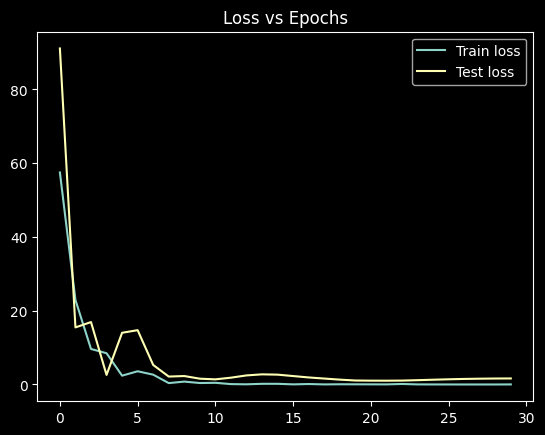

In [109]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title(f'Loss vs Epochs')
plt.legend()
plt.show()

In [110]:
ypred = model.predict(x_test)
print(ypred[:10])

1/1 [==============================] - 0s 108ms/step
[[4.6180597e-01 5.3819400e-01]
 [6.1129876e-18 1.0000000e+00]
 [8.8167149e-01 1.1832848e-01]
 [1.5590814e-01 8.4409189e-01]
 [9.9977070e-01 2.2930156e-04]
 [9.9999976e-01 1.9217063e-07]
 [9.9980479e-01 1.9521907e-04]
 [1.3259820e-07 9.9999988e-01]
 [3.5560300e-18 1.0000000e+00]
 [2.2002034e-01 7.7997965e-01]]


In [111]:
ypred_lab = [np.argmax(i) for i in ypred]
print(ypred_lab[:10])

[1, 1, 0, 1, 0, 0, 0, 1, 1, 1]


**Checking The Model**

In [112]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence No, Its not a tumor


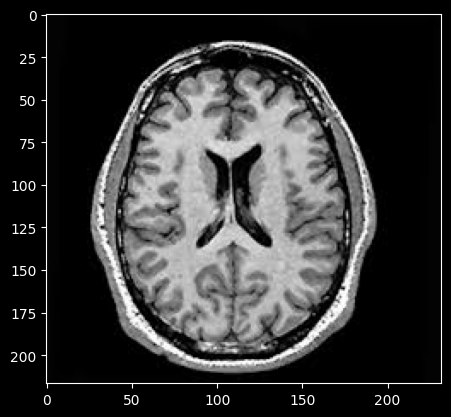

In [117]:
from matplotlib.pyplot import imshow
img = Image.open(r'/content/drive/MyDrive/Brain_Tumor/brain_tumor_dataset/no/25 no.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.03006553649902% Confidence Its a Tumor


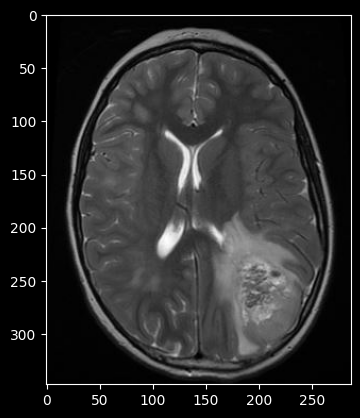

In [115]:
from matplotlib.pyplot import imshow
img = Image.open(r'/content/drive/MyDrive/Brain_Tumor/brain_tumor_dataset/yes/Y100.JPG')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence Its a Tumor


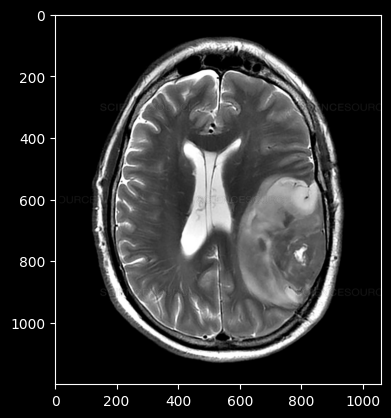

In [116]:
from matplotlib.pyplot import imshow
img = Image.open(r'/content/drive/MyDrive/Brain_Tumor/brain_tumor_dataset/yes/Y108.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))